In [ ]:
import  numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
data1=pd.read_excel('AI_P_2022.xlsx')
print(data1)

                                               Comments  Opinion  Sarcasm
0                                            mli7 yabta      0.0      0.0
1     Ok3do ken gahfo wjoukom w etsaro hdheka fech f...     -1.0      0.0
2                                   Marhbe pfizer jenna      1.0      0.0
3                                           ولن ألحق...     -1.0      0.0
4                                     شكرا رئيس جمهورية      1.0      0.0
...                                                 ...      ...      ...
6477       ياخي  كان  كي  يوصلك  msg  ولا  حملة  ل الكل      0.0      1.0
6478  ياخي الأطفال مازالو ما قيدوش و عندهم الأولوية ...      0.0      1.0
6479               ياخي الي مرض بيها يلقح ولا بعد 6شهور      0.0      1.0
6480  ياخي إلي يمشي يلقح ليوم يلزم بال SMS ولا عادي ...      0.0      1.0
6481  ياخي بالحق ماتسافر كان ماتلقح و اللي يعمل جرعة...      0.0      1.0

[6482 rows x 3 columns]


**Data Cleaning**

In [ ]:
data1.drop_duplicates(subset ="Comments", keep = 'first', inplace=True)
print(data1)

                                               Comments  Opinion  Sarcasm
0                                            mli7 yabta      0.0      0.0
1     Ok3do ken gahfo wjoukom w etsaro hdheka fech f...     -1.0      0.0
2                                   Marhbe pfizer jenna      1.0      0.0
3                                           ولن ألحق...     -1.0      0.0
4                                     شكرا رئيس جمهورية      1.0      0.0
...                                                 ...      ...      ...
6472                              يا ولادي وقتاش ناوين؟      0.0      1.0
6474  يا ولدي ماعنديش حتى مشكلة مع التلقيح مشكلتي ال...      0.0      1.0
6477       ياخي  كان  كي  يوصلك  msg  ولا  حملة  ل الكل      0.0      1.0
6480  ياخي إلي يمشي يلقح ليوم يلزم بال SMS ولا عادي ...      0.0      1.0
6481  ياخي بالحق ماتسافر كان ماتلقح و اللي يعمل جرعة...      0.0      1.0

[5136 rows x 3 columns]


In [ ]:
data=data1.dropna(how='any')
print(data)

                                               Comments  Opinion  Sarcasm
0                                            mli7 yabta      0.0      0.0
1     Ok3do ken gahfo wjoukom w etsaro hdheka fech f...     -1.0      0.0
2                                   Marhbe pfizer jenna      1.0      0.0
3                                           ولن ألحق...     -1.0      0.0
4                                     شكرا رئيس جمهورية      1.0      0.0
...                                                 ...      ...      ...
6472                              يا ولادي وقتاش ناوين؟      0.0      1.0
6474  يا ولدي ماعنديش حتى مشكلة مع التلقيح مشكلتي ال...      0.0      1.0
6477       ياخي  كان  كي  يوصلك  msg  ولا  حملة  ل الكل      0.0      1.0
6480  ياخي إلي يمشي يلقح ليوم يلزم بال SMS ولا عادي ...      0.0      1.0
6481  ياخي بالحق ماتسافر كان ماتلقح و اللي يعمل جرعة...      0.0      1.0

[5134 rows x 3 columns]


In [ ]:
data.isnull()

,Comments,Opinion,Sarcasm
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
6472,False,False,False
6474,False,False,False
6477,False,False,False
6480,False,False,False


In [ ]:
data.isnull().sum()

Comments    0
Opinion     0
Sarcasm     0
dtype: int64

**Data exploring**

In [ ]:
data.head()

,Comments,Opinion,Sarcasm
0,mli7 yabta,0.0,0.0
1,Ok3do ken gahfo wjoukom w etsaro hdheka fech f...,-1.0,0.0
2,Marhbe pfizer jenna,1.0,0.0
3,ولن ألحق...,-1.0,0.0
4,شكرا رئيس جمهورية,1.0,0.0


In [ ]:
data.tail()

,Comments,Opinion,Sarcasm
6472,يا ولادي وقتاش ناوين؟,0.0,1.0
6474,يا ولدي ماعنديش حتى مشكلة مع التلقيح مشكلتي ال...,0.0,1.0
6477,ياخي كان كي يوصلك msg ولا حملة ل الكل,0.0,1.0
6480,ياخي إلي يمشي يلقح ليوم يلزم بال SMS ولا عادي ...,0.0,1.0
6481,ياخي بالحق ماتسافر كان ماتلقح و اللي يعمل جرعة...,0.0,1.0


In [ ]:
data.shape

(5134, 3)

In [ ]:
data.columns

Index(['Comments', 'Opinion', 'Sarcasm'], dtype='object')

**Data Description**

In [ ]:
data.describe()

,Opinion,Sarcasm
count,5134.000000,5134.000000
mean,-0.177250,0.243670
std,0.604339,0.574164
min,-1.000000,-1.000000
25%,-1.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


**Checking for information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 0 to 6481
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Comments  5134 non-null   object 
 1   Opinion   5134 non-null   float64
 2   Sarcasm   5134 non-null   float64
dtypes: float64(2), object(1)
memory usage: 160.4+ KB


In [ ]:
data.Opinion.value_counts()

 0.0    3098
-1.0    1473
 1.0     563
Name: Opinion, dtype: int64

In [ ]:
data.Sarcasm.value_counts()

 0.0    3137
 1.0    1624
-1.0     373
Name: Sarcasm, dtype: int64

In [ ]:
data.Opinion.value_counts()

 0.0    3098
-1.0    1473
 1.0     563
Name: Opinion, dtype: int64

In [ ]:
data.count()

Comments    5134
Opinion     5134
Sarcasm     5134
dtype: int64

**Data Visualisation**

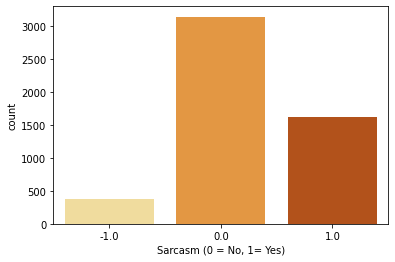

In [ ]:
sns.countplot(x='Sarcasm', data=data, palette="YlOrBr")
plt.xlabel("Sarcasm (0 = No, 1= Yes)")
plt.show()

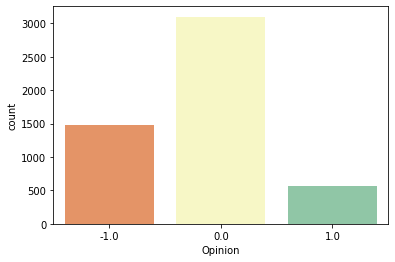

In [ ]:
sns.countplot(x="Opinion", data=data, palette="Spectral")
plt.show()

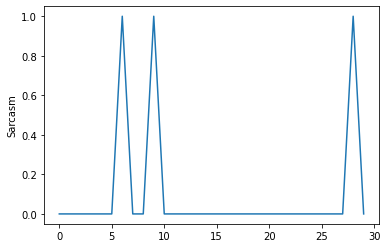

In [ ]:
sns.lineplot(data=data["Sarcasm"][:30])

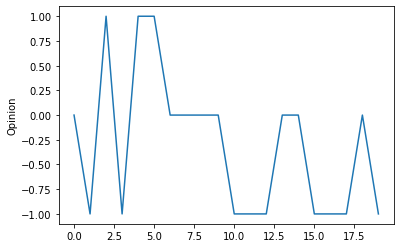

In [ ]:
sns.lineplot(data=data["Opinion"][:20])

**Percentage**

In [ ]:
countFORvaccin = len(data[data.Opinion == 1])
countAgainstvaccin = len(data[data.Opinion == -1])
countNeutrevaccin = len(data[data.Opinion == 0])
print("Percentage of People positive for vaccin: {:.2f}%".format((countFORvaccin / (len(data.Opinion))*100)))
print("Percentage of People negative for vaccin: {:.2f}%".format((countAgainstvaccin / (len(data.Opinion))*100)))
print("Percentage of People neutre for vaccin: {:.2f}%".format((countNeutrevaccin / (len(data.Opinion))*100)))

Percentage of People positive for vaccin: 10.97%
Percentage of People negative for vaccin: 28.69%
Percentage of People neutre for vaccin: 60.34%


In [ ]:
countSarcastic = len(data[data.Sarcasm == 1])
print("Percentage of People sarcasting: {:.2f}%".format((countSarcastic / (len(data.Sarcasm))*100)))

Percentage of People sarcasting: 31.63%


([<matplotlib.patches.Wedge at 0x7f9cebf735d0>,
 [Text(-0.5110025787864272, 0.9741028510756046, 'positive'),
  Text(0.5110024875843339, -0.9741028989191147, 'negative')],
 [Text(-0.2787286793380511, 0.5313288278594206, '15.4%'),
  Text(0.2787286295914548, -0.5313288539558807, '84.6%')])

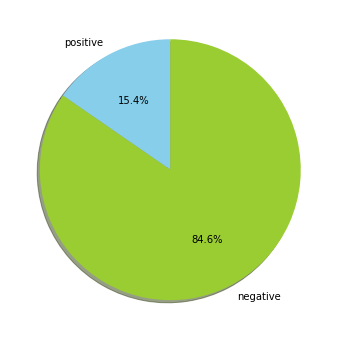

In [ ]:
positive =len(data[data['Opinion'] == 1])
negative = len(data[data['Opinion']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'positive','negative'
sizes = [positive,negative]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

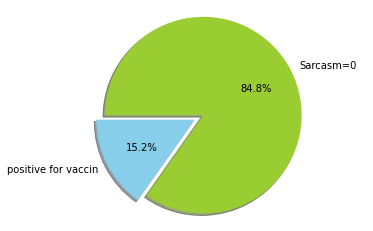

In [ ]:
# Data to plot
labels = 'positive for vaccin','Sarcasm=0'
sizes = [len(data[data['Opinion'] == 1]),len(data[data['Sarcasm'] == 0])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

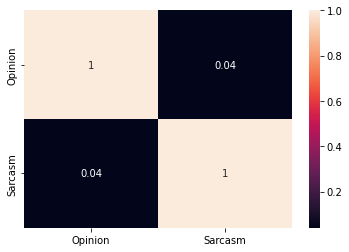

In [ ]:
corre=data.corr()
sns.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns, annot=True)

**Fitting**

In [ ]:
words_list = data.Comments.tolist()
labels_list = data.Sarcasm.tolist()
assert(len(words_list)==len(labels_list))
len(words_list)

5134

In [ ]:
words_train,words_test,labels_train,labels_test = train_test_split(words_list, labels_list, test_size=0.25, stratify=labels_list, random_state=123)
len(words_train), len(words_test)

(3850, 1284)

In [ ]:
# important hyperparameter of this method: maximum order of ngram features
N = 10

In [ ]:
vectorizer = TfidfVectorizer( ngram_range=(1, N), analyzer='char_wb')

In [ ]:
x_train_1 = vectorizer.fit_transform(words_train)
type(x_train_1), x_train_1.shape

(scipy.sparse.csr.csr_matrix, (3850, 199397))

In [ ]:
print(x_train_1.toarray())

[[0.30714591 0.         0.         ... 0.         0.         0.        ]
 [0.22702743 0.         0.         ... 0.         0.         0.        ]
 [0.25670563 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.11529236 0.         0.         ... 0.         0.         0.        ]
 [0.45789256 0.         0.         ... 0.         0.         0.        ]
 [0.2025879  0.         0.         ... 0.         0.         0.        ]]


In [ ]:
x_test_1 = vectorizer.transform(words_test)
type(x_test_1), x_test_1.shape

(scipy.sparse.csr.csr_matrix, (1284, 199397))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train_1, labels_train)
y_pred = knn.predict(x_test_1)
#Score/Accuracy
print("Accuracy --> ", knn.score(x_test_1, labels_test)*100)

Accuracy -->  62.53894080996885


In [ ]:
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
#Fit the model
#model.fit(x_train, y_train)
#y_pred = model.predict(x_test)
#Score/Accuracy
#print("Accuracy --> ", model.score(x_test, y_test)*100)

In [ ]:

feature_names = np.asarray(vectorizer.get_feature_names())
type(feature_names),feature_names.shape




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(numpy.ndarray, (199397,))

In [ ]:
# Store some properties of the features in a data frame for convenience
feature_properties_df = pd.DataFrame({'feature':feature_names})

feature_properties_df['DF'] = np.array((x_train_1>0).sum(axis=0)).ravel()
feature_properties_df['IDF'] = vectorizer.idf_
feature_properties_df['max_tfidf'] = x_train_1.max(axis=0).toarray().ravel()
feature_properties_df = feature_properties_df[['feature', 'DF', 'IDF','max_tfidf']]

In [ ]:
print(feature_properties_df.head())

  feature    DF       IDF  max_tfidf
0          3850  1.000000   0.610432
1       !    69  5.007593   0.161317
2      !     27  5.923884   0.190835
3      !!    39  5.567209   0.137112
4     !!     12  6.691139   0.164793


In [ ]:
cm=confusion_matrix(labels_test,y_pred)
cm



array([[  0,  85,   8],
       [  0, 738,  47],
       [  2, 339,  65]])

In [ ]:
accuracy_score(labels_test,y_pred)

0.6253894080996885

In [ ]:
print(classification_report(labels_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        93
         0.0       0.64      0.94      0.76       785
         1.0       0.54      0.16      0.25       406

    accuracy                           0.63      1284
   macro avg       0.39      0.37      0.34      1284
weighted avg       0.56      0.63      0.54      1284

